In [3]:
import sklearn as sk
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame 

In [4]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5, random_state=11)
m = 200

In [5]:
X.shape

(200, 2)

In [6]:
Y.shape

(200,)

<AxesSubplot:>

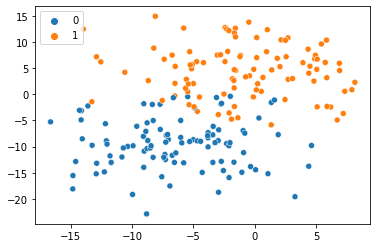

In [7]:
sns.scatterplot(x = X[:,0], y = X[:,1],hue = Y)

### Lets initialize the parameter first 

In [8]:
def initialize_parameters(dim):    
    w = np.random.randn(dim,1)*0.01
    b = np.zeros((1,1))
    #print(w.shape)
    #print(b.shape)
    return w,b


In [9]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a 

In [10]:
print(Y.shape)
print(X.shape[0])

(200,)
200


### calculate predicted value of y 

In [11]:
def y_prediction(X,w,b):
    w,b = initialize_parameters(X.shape[1])
    Z = (np.dot(X,w))+b
    A = sigmoid(Z)
    #print(A)
    return A

### calculate cost function 

In [12]:
def cost_function(X,w,b):
    A = y_prediction(X,w,b)
    L = Y*np.log(A) + (1-Y)*np.log(1-A)
    L = (-1/m)*np.sum(L,axis=0)
    #print(L)
    return L

In [13]:
w,b = initialize_parameters(X.shape
                          [1])
A = y_prediction(X,w,b)

print(A.shape)
print(Y.shape)
print(X.shape)

(200, 1)
(200,)
(200, 2)


### Code the gradient descent

In [14]:
def gradient_descent(A,Y,X,w,b,learning_rate):
    dw0 = sum(np.dot((A-Y).T,X[:,0]))
    dw1 = sum(np.dot((A-Y).T,X[:,1]))
    db = ( A - Y )*1
    j = 0
    while(True):
        w0 = w[0] - learning_rate*dw0
        w1 = w[1] - learning_rate*dw1
        b0 = b - learning_rate*db
        w_new = [w0,w1]
        if ( j > 500 ): 
            return w_new, b0

        j = j +1

In [15]:
w,b = initialize_parameters(X.shape[1])
A = y_prediction(X,w,b)
w_new,b0 = gradient_descent(A,Y,X,w,b,0.01)



In [16]:
print(X.shape)

(200, 2)


In [17]:
print(X.ndim)

2


In [18]:
x1 = X[:,0]
x1.ndim

1

In [19]:
x2 = X[:,1]
x2.ndim

1

In [20]:
w_new

[array([26.28960705]), array([39.60274366])]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


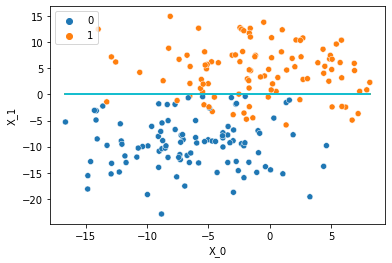

In [21]:
def graph(formula):   
    x = x1
    y = formula()  
    plt.plot(x, y)  
    
def my_formula():
    return (-b0 -(w_new[0]/100)*x1)/w_new[1]/100

fig, ax = plt.subplots()
sns.scatterplot(x1,x2,hue=Y)
graph(my_formula)
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()